# Importing Libraries

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Loading Data

In [335]:
os.chdir('C:\\Users\\Avita\\OneDrive\\Desktop\\Capstone Project\\Employee Attrition')

In [336]:
cust_df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [337]:
cust_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Checking Data

In [338]:
cust_df.shape

(1470, 35)

In [339]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [340]:
cust_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [341]:
cust_df.describe().T.drop(columns=['count','mean','std'])

,min,25%,50%,75%,max
Age,18.0,30.00,36.0,43.00,60.0
DailyRate,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1.0,2.00,7.0,14.00,29.0
Education,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1.0,2.00,3.0,4.00,4.0
HourlyRate,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1.0,2.00,3.0,3.00,4.0
JobLevel,1.0,1.00,2.0,3.00,5.0


# Data Cleaning 

In [342]:
cust_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [343]:
# No null value present 

In [344]:
cust_df.duplicated().sum()

0

In [345]:
# No duplicates found

# EDA and Visualization

In [346]:
cust_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [347]:
# Histogram - to show the distibution of single continuous column

In [348]:
num_col=cust_df.select_dtypes('number')

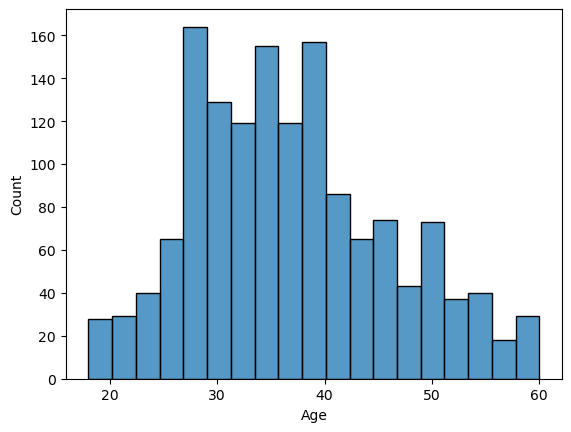

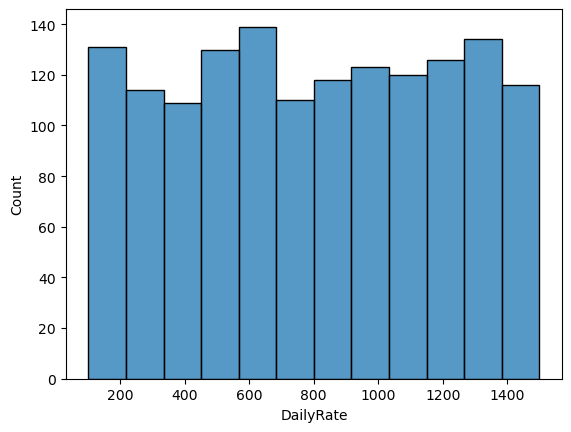

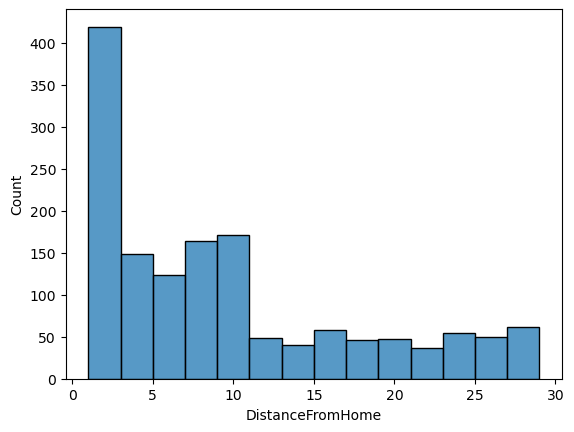

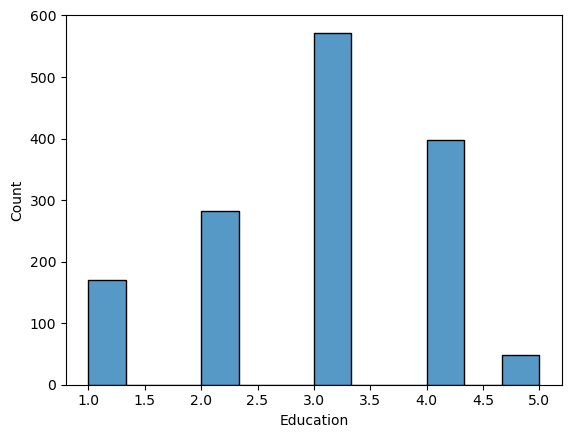

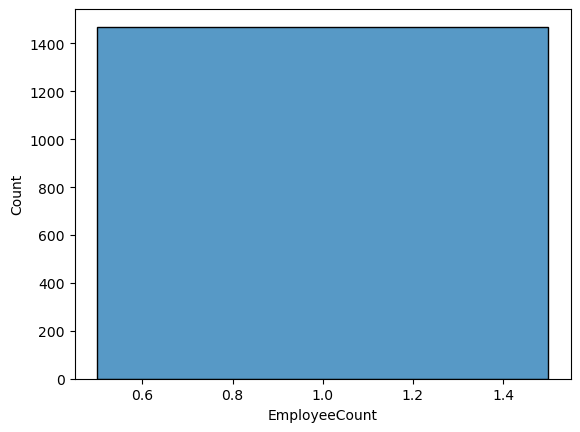

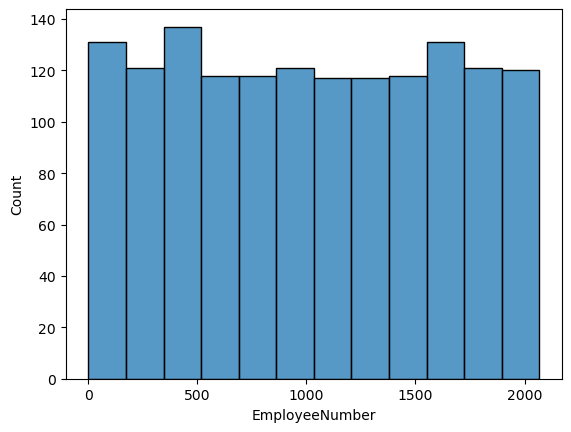

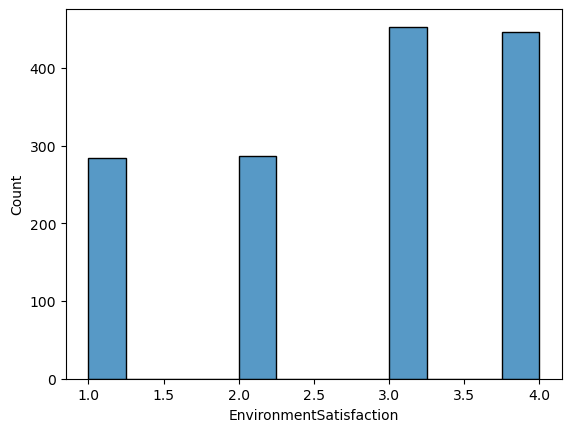

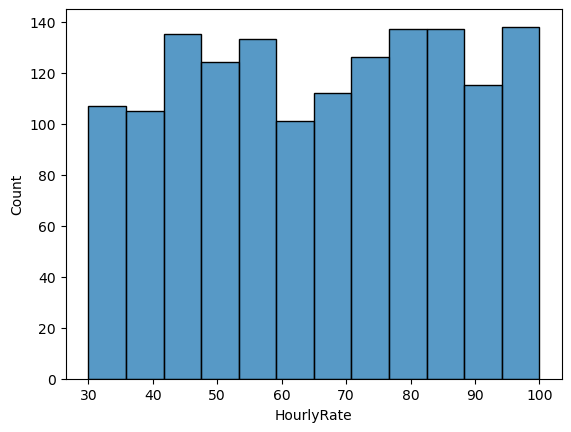

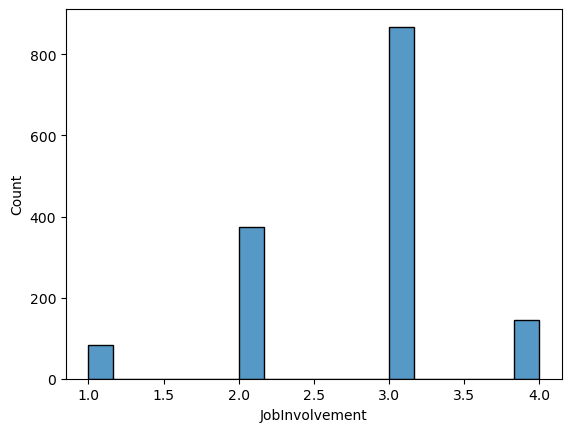

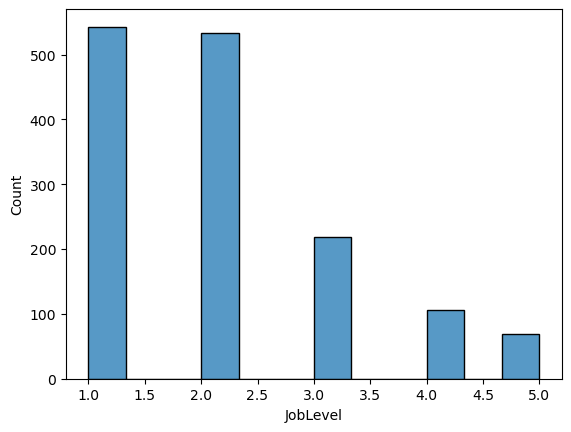

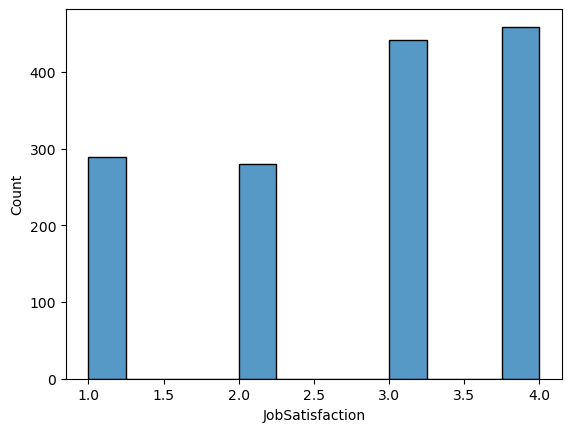

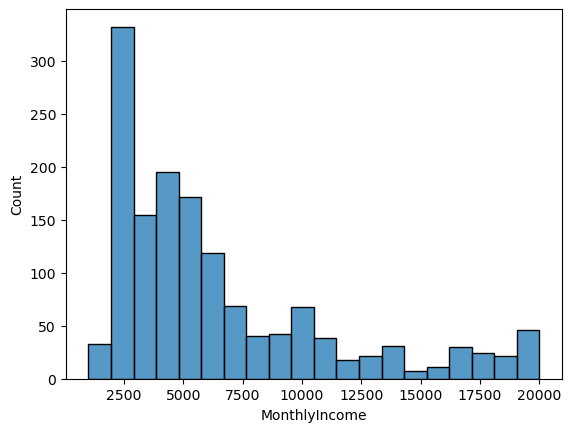

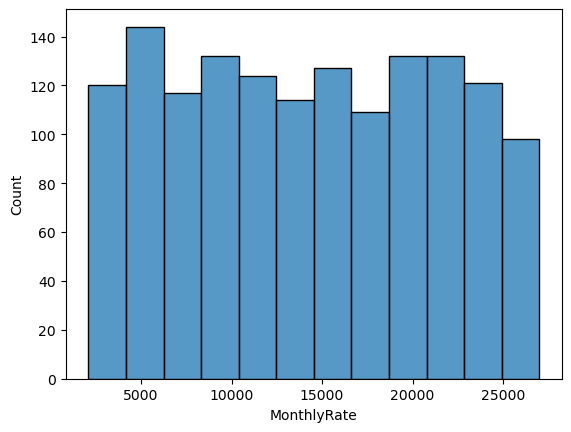

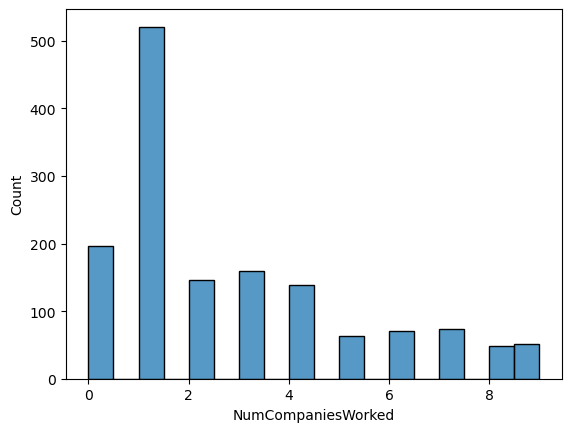

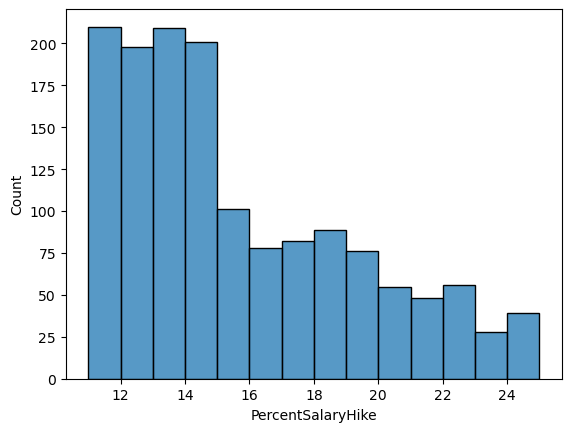

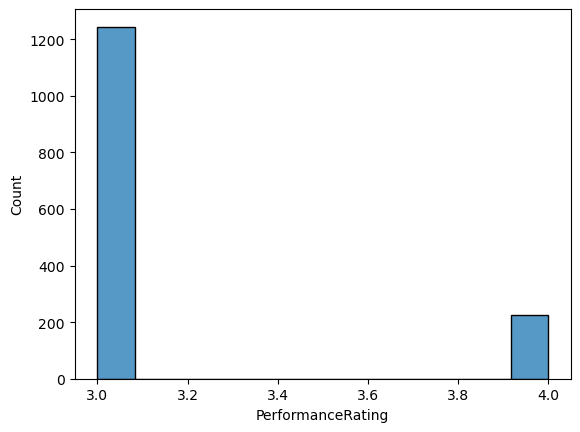

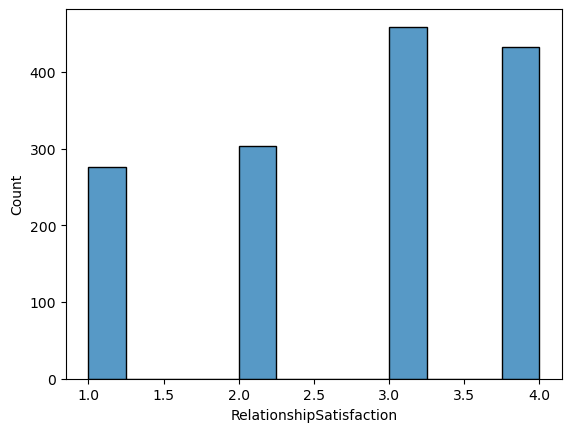

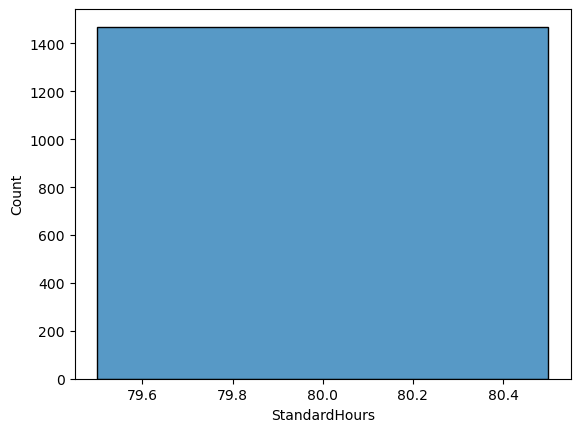

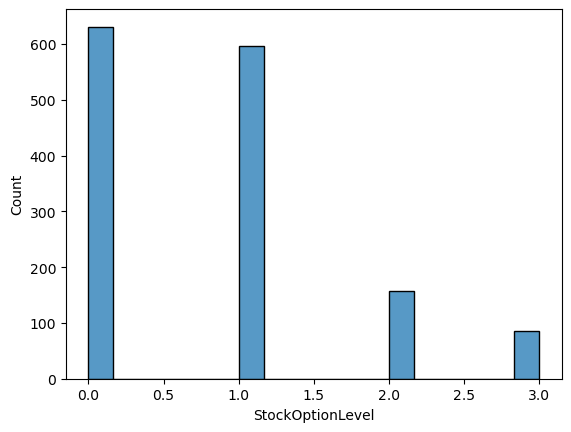

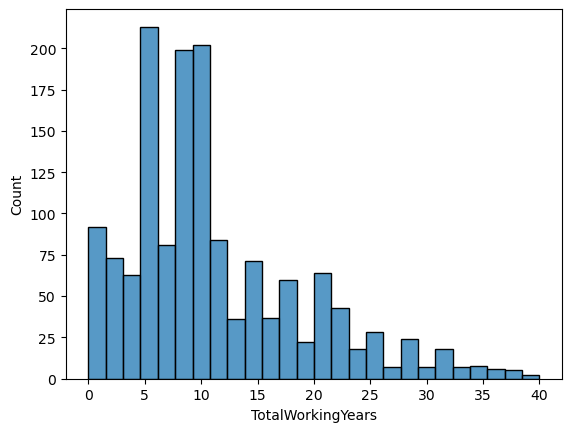

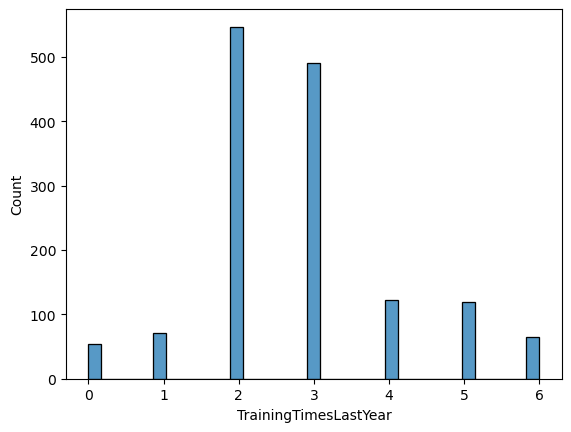

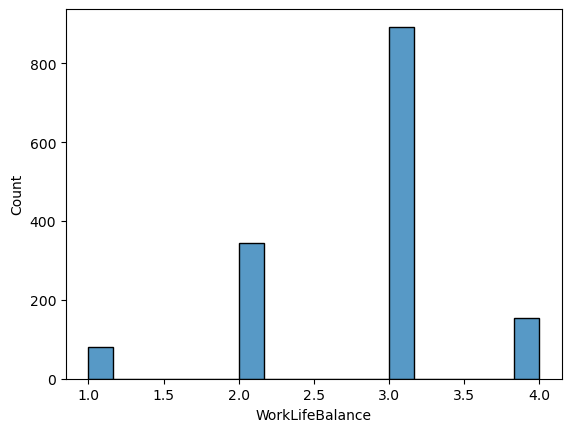

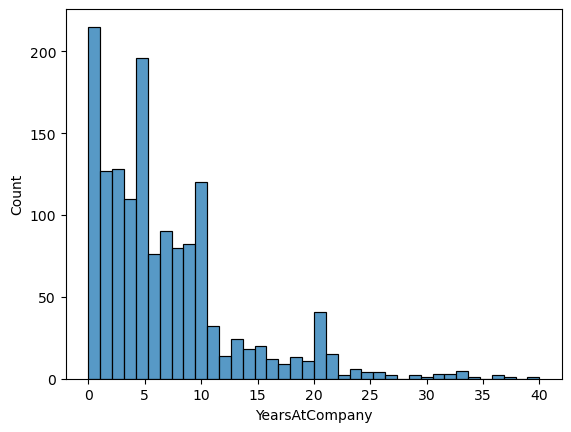

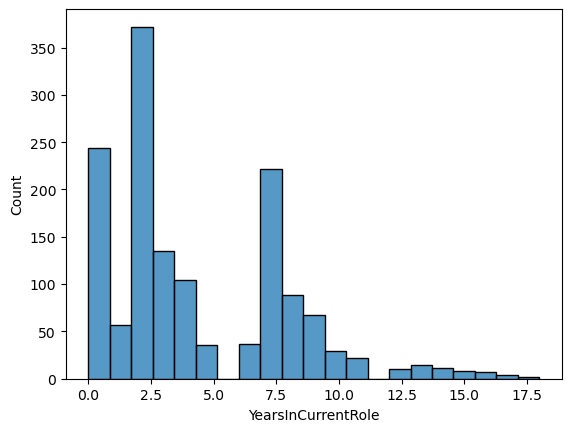

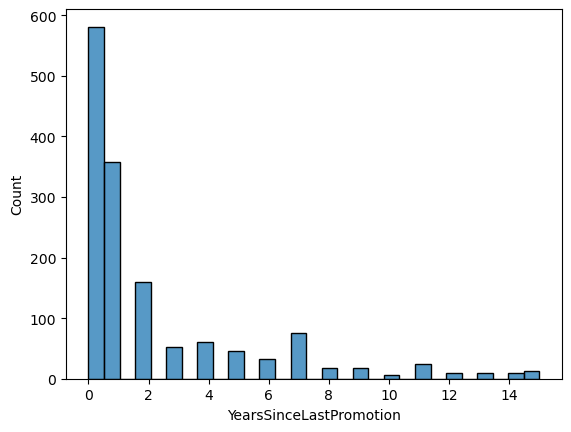

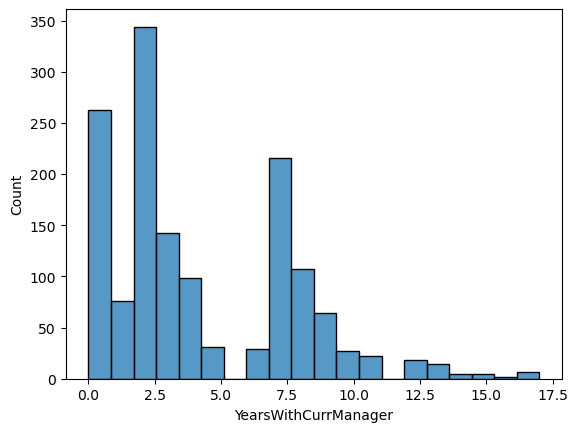

In [349]:
for i in num_col:
    sns.histplot(data=num_col,x=i)
    plt.show()

### Observation

### -Age: Most employees are between 27 to 40 years old.

### -MonthlyIncome: Income is left-skewed — most people earn in the low range, with a few medium and high earners.

### -YearsAtCompany: A large number of employees have been with the company for only 1 to 5 years.

### -TotalWorkingYears: Most employees have 5–10 years of experience.

### -YearsSinceLastPromotion: Most haven't had a promotion in the last few years (0–2 years common)

In [350]:
# Boxplot- to check mean median and outliers of numeric column

In [351]:
num_col.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber'],inplace=True)

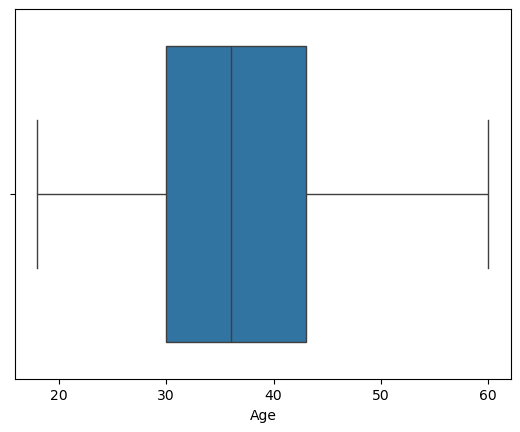

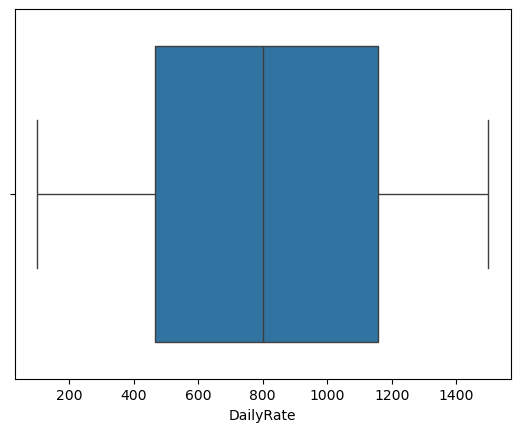

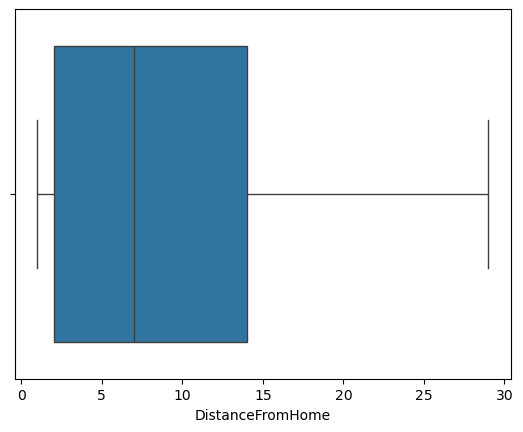

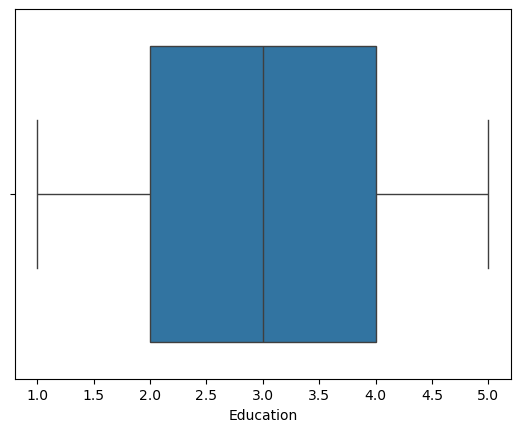

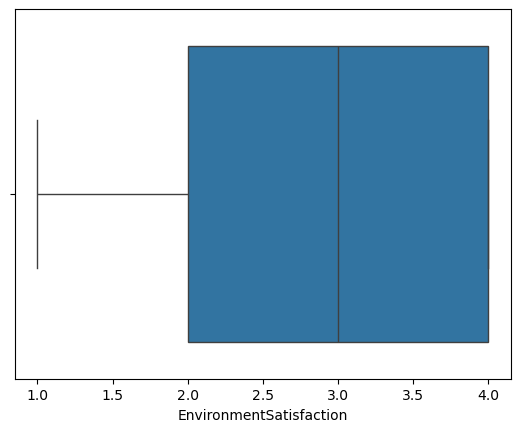

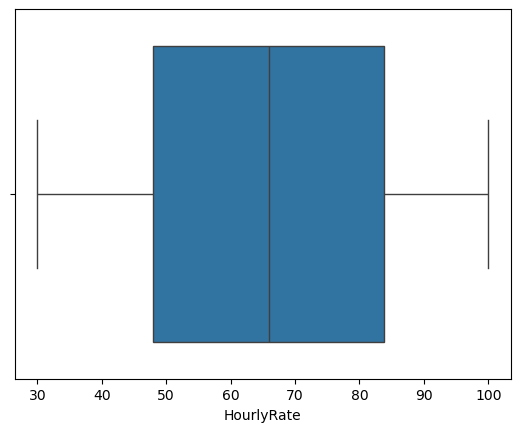

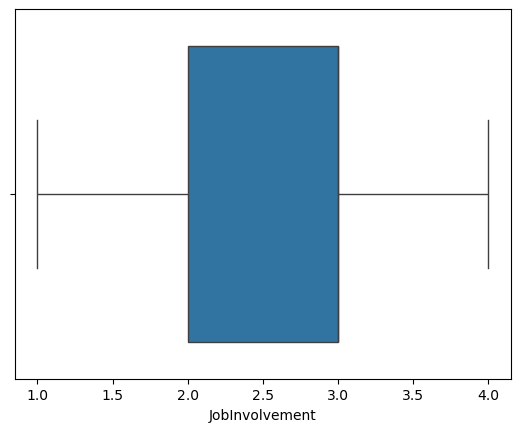

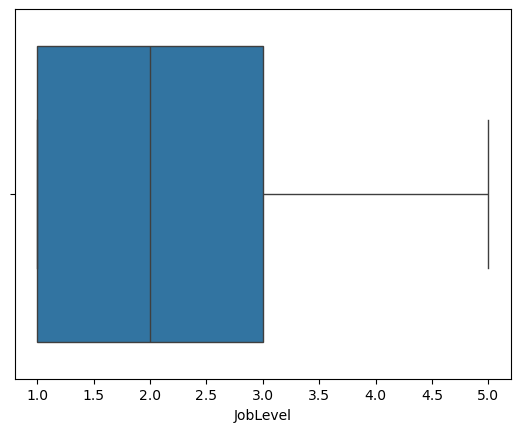

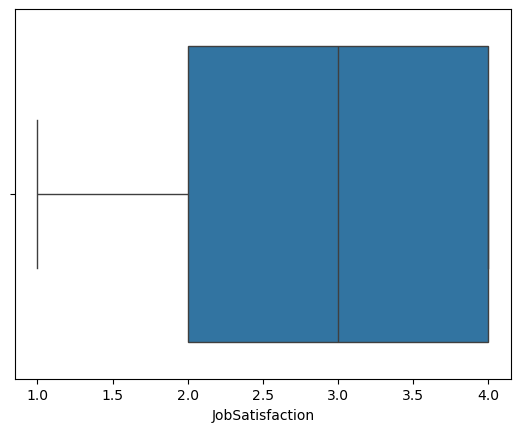

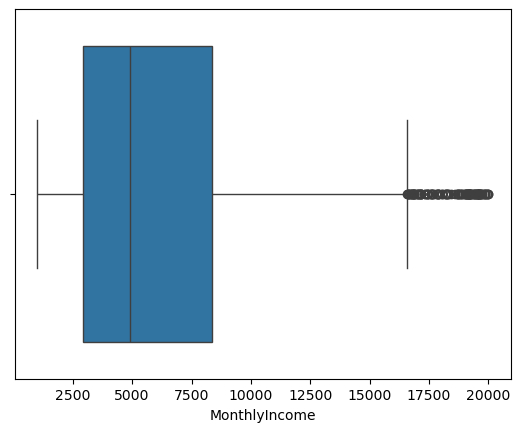

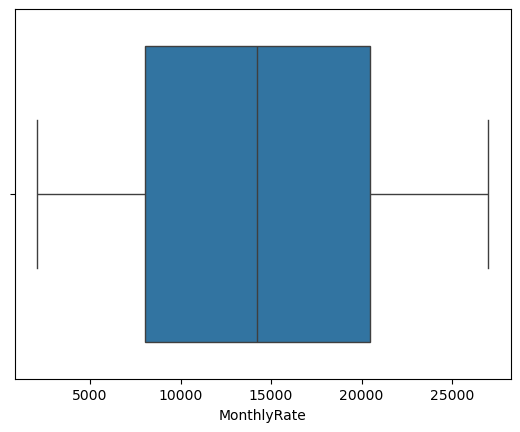

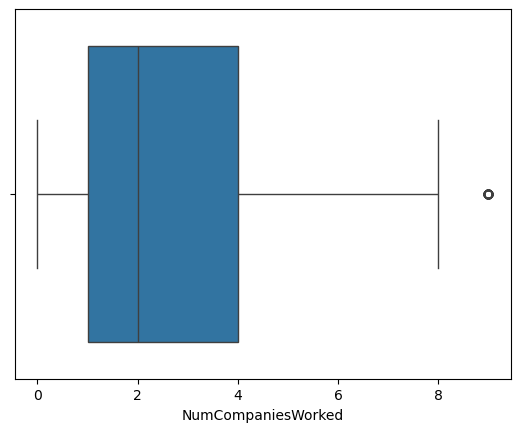

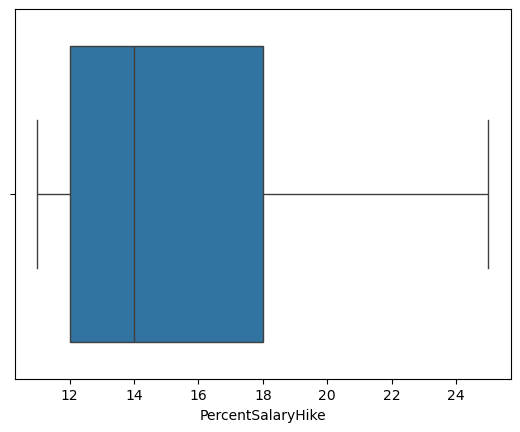

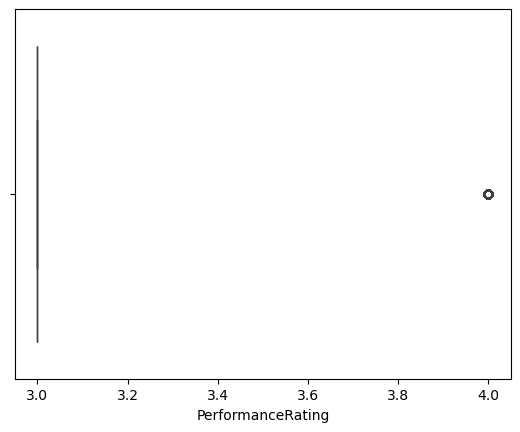

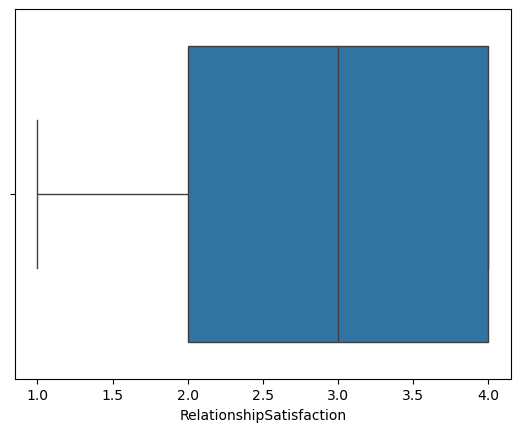

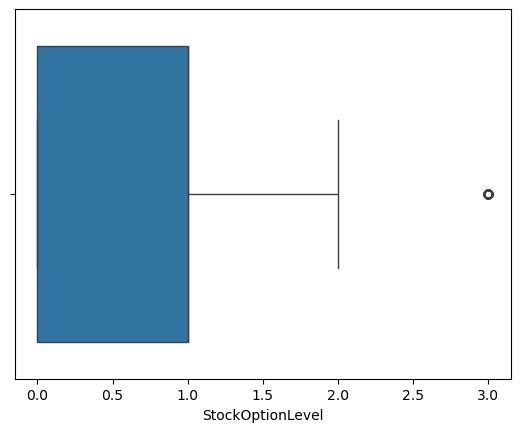

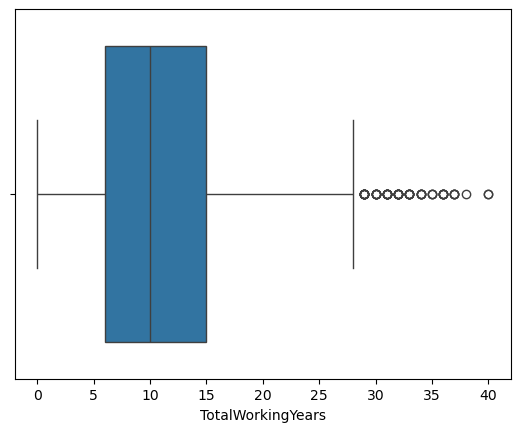

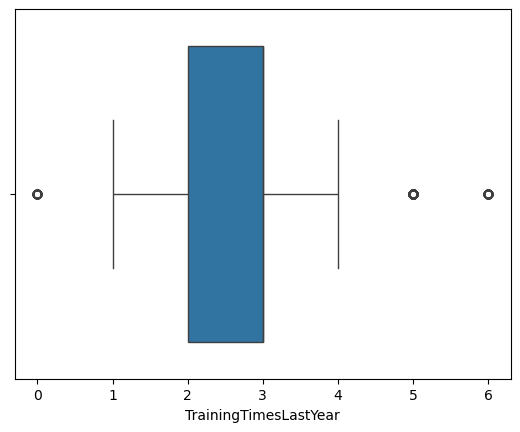

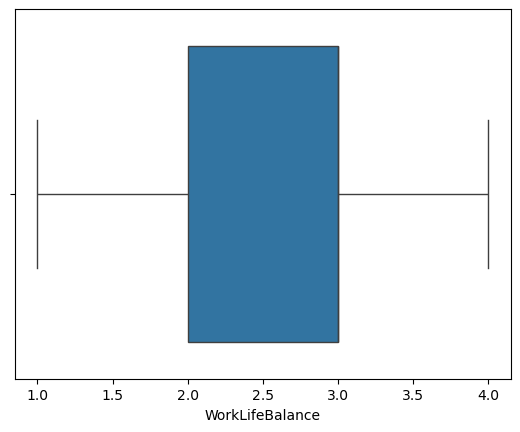

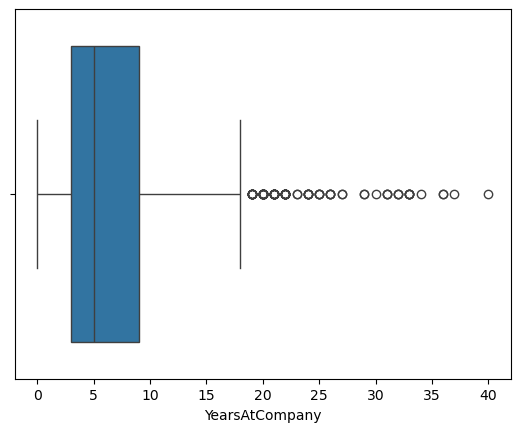

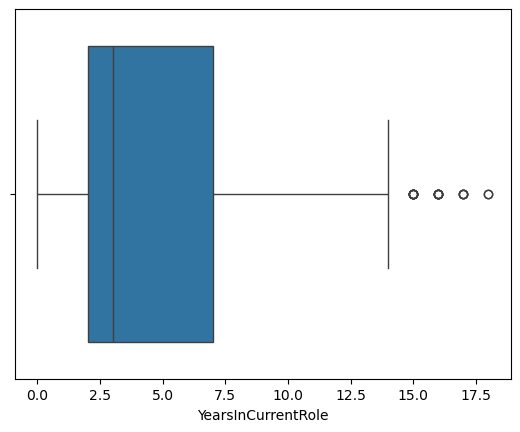

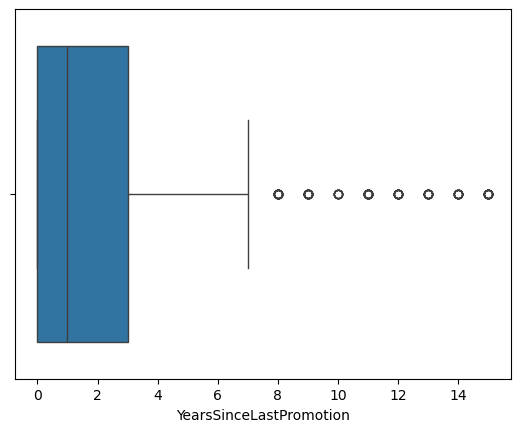

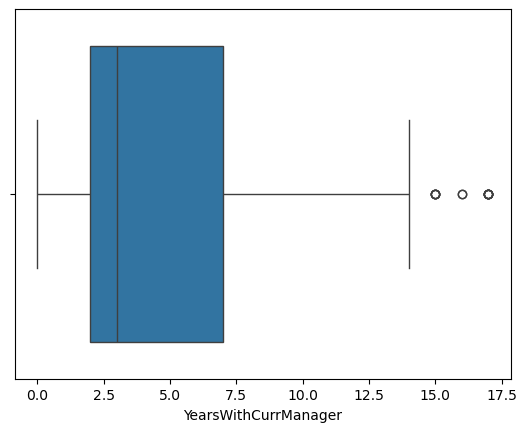

In [352]:
for i in num_col:
    sns.boxplot(data=num_col,x=i)
    plt.show()

### Observation 
### I have dropped EmployeeCount,StandardHours,EmployeeNumber because all rows contains unique value so can't get any insight from this.
### I found some ouliters in Age , Monthly income , Distance from home ,YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion but they all seem resonable so not treating any of them

In [353]:
# Heatmap- to show how two categorical variable are related

In [354]:
num_corr=num_col.corr()

<Axes: >

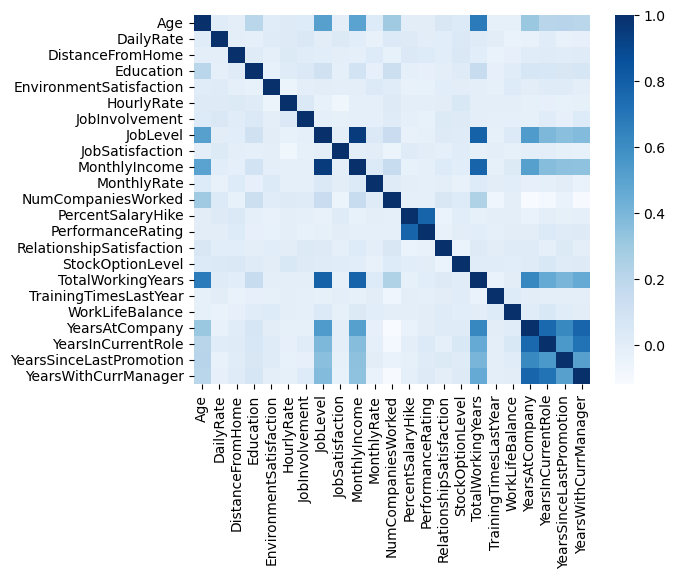

In [355]:
sns.heatmap(data=num_corr,cmap='Blues')

### Observation
### The correlation heatmap shows very weak relationships among all numeric features
### There is no concern of multicollinearity in the data

In [356]:
# Barplot/Countplot- to show the occurance of category data

In [357]:
cat_col=cust_df.select_dtypes('object')

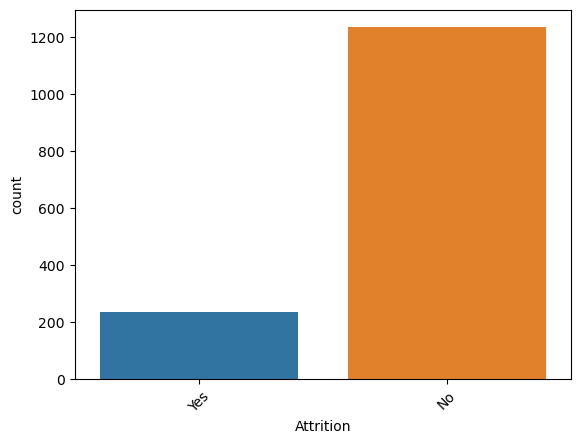

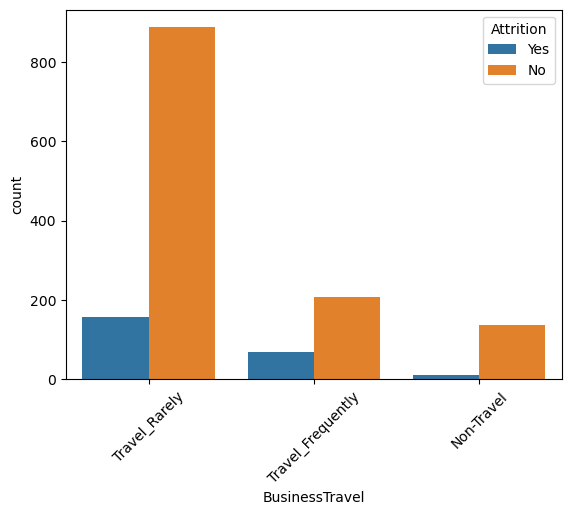

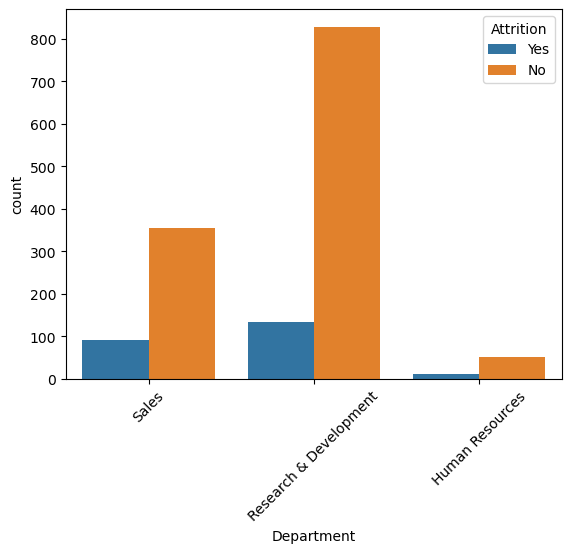

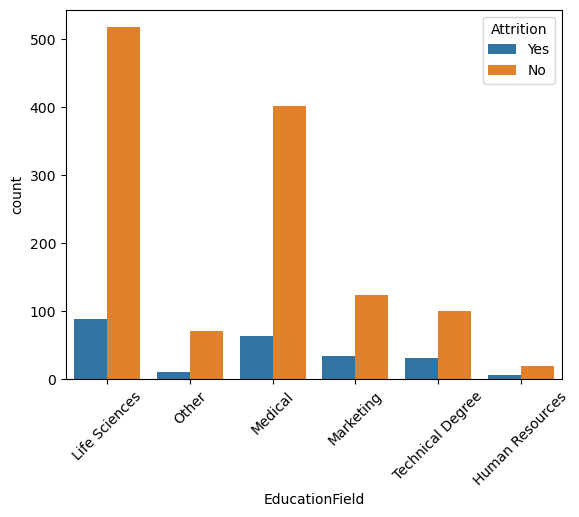

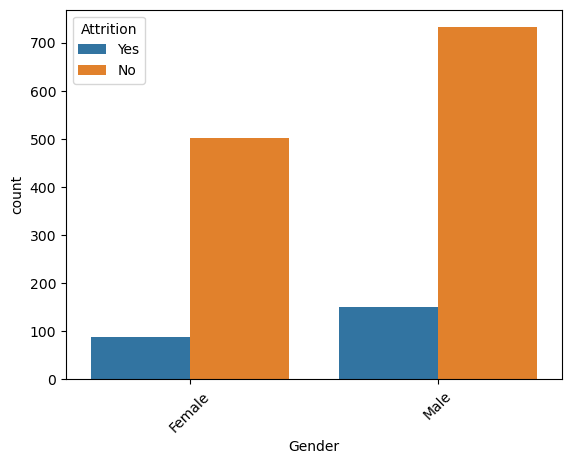

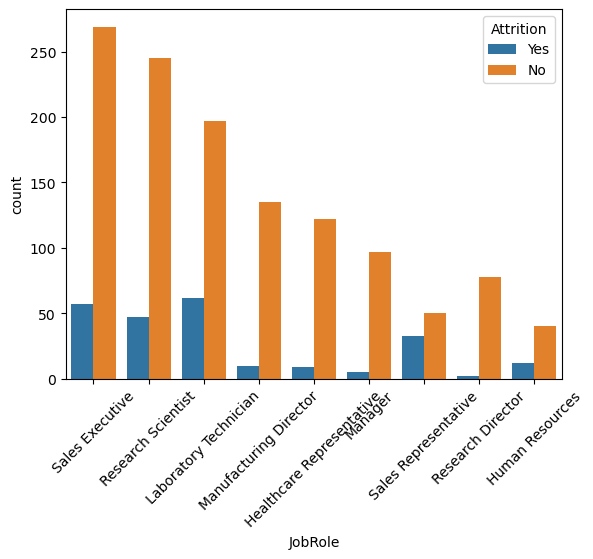

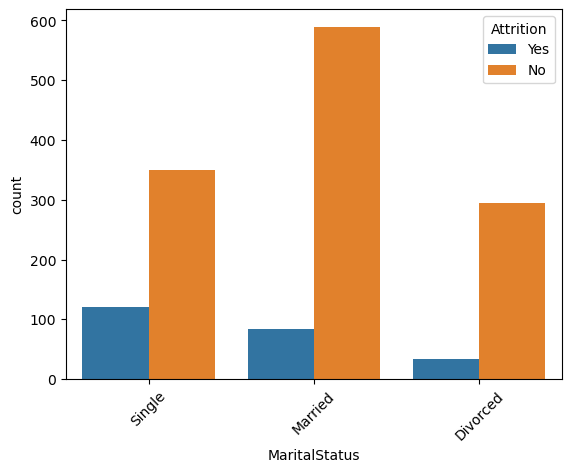

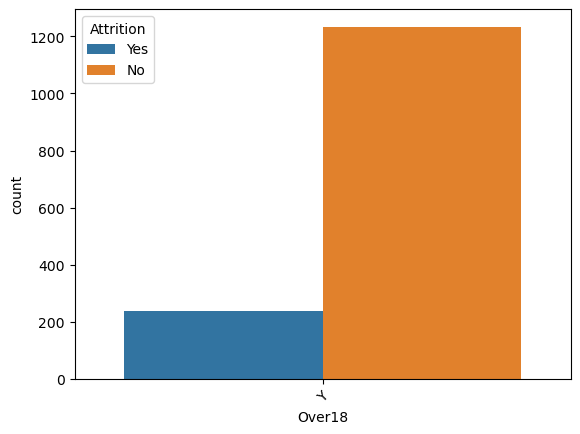

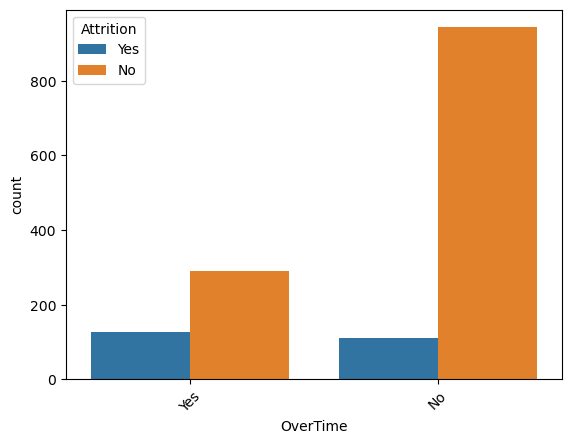

In [358]:
for i in cat_col:
    sns.countplot(data=cust_df,x=i,hue='Attrition')
    plt.xticks(rotation=45)
    plt.show()

### -Gender: Attrition rate seems slightly higher for males than females.

### -MaritalStatus: 'Single' employees show higher attrition compared to 'Married' or 'Divorced'.

### -Department: Research and Development department has highest attrition

### -OverTime: Employees working overtime have significantly higher attrition.

### -JobRole: Certain roles like 'Laboratory Technician' , 'Sales Executive' have higher attrition wheras roles like 'Healthcare Manager' , Sales Representative have low attrition rate .

### -BusinessTravel: 'Travel_rarely' group has the highest number of people.

In [359]:
# 1. Average Monthly Income by Job Role

In [360]:
cust_df[['JobRole', 'MonthlyIncome']].groupby('JobRole')\
.mean().sort_values(by='MonthlyIncome', ascending=False)

,MonthlyIncome
JobRole,
Manager,17181.676471
Research Director,16033.550000
Healthcare Representative,7528.763359
Manufacturing Director,7295.137931
Sales Executive,6924.279141
Human Resources,4235.750000
Research Scientist,3239.972603
Laboratory Technician,3237.169884
Sales Representative,2626.000000


In [361]:
# 2. Attrition Count by Department

In [362]:
cust_df[['Department', 'Attrition']].groupby('Department') \
  .Attrition.value_counts().unstack().sort_values(by='Yes', ascending=False)

Attrition,No,Yes
Department,,
Research & Development,828,133
Sales,354,92
Human Resources,51,12


In [363]:
# 3. Attrition Count by Job Role

In [364]:
cust_df[['JobRole','Attrition']].groupby('JobRole') \
  .Attrition.value_counts().unstack().sort_values(by='Yes', ascending=False)

Attrition,No,Yes
JobRole,,
Laboratory Technician,197,62
Sales Executive,269,57
Research Scientist,245,47
Sales Representative,50,33
Human Resources,40,12
Manufacturing Director,135,10
Healthcare Representative,122,9
Manager,97,5
Research Director,78,2


In [365]:
# 4. Mean Satisfaction Scores by Attrition

In [366]:
cust_df[['Attrition','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']] \
  .groupby('Attrition').mean().sort_values(by='JobSatisfaction', ascending=False)


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
Attrition,,,
No,2.771290,2.778589,2.781022
Yes,2.464135,2.468354,2.658228


In [367]:
# 5. Average Training Times by Job Role

In [368]:
cust_df[['JobRole', 'TrainingTimesLastYear']].groupby('JobRole') \
  .mean().sort_values(by='TrainingTimesLastYear', ascending=False)


,TrainingTimesLastYear
JobRole,
Sales Representative,3.012048
Laboratory Technician,2.949807
Sales Executive,2.831288
Manager,2.813725
Research Director,2.775000
Healthcare Representative,2.748092
Manufacturing Director,2.744828
Research Scientist,2.664384
Human Resources,2.557692


In [369]:
# 6. Years at Company vs. Attrition

In [370]:
cust_df[['Attrition', 'YearsAtCompany']].groupby('Attrition') \
  .mean().sort_values(by='YearsAtCompany', ascending=False)


,YearsAtCompany
Attrition,
No,7.369019
Yes,5.130802


In [371]:
# 7. Highest Attrition Rate by Marital Status

In [372]:
cust_df.groupby('MaritalStatus')['Attrition'] \
  .apply(lambda x: (x == 'Yes').mean()*100).sort_values(ascending=False)

MaritalStatus
Single      25.531915
Married     12.481426
Divorced    10.091743
Name: Attrition, dtype: float64

In [373]:
# 8. Stock Option Level vs. Attrition Rate

In [374]:
cust_df.groupby('StockOptionLevel')['Attrition'] \
  .apply(lambda x: (x == 'Yes').mean()*100).sort_values(ascending=False)

StockOptionLevel
0    24.405705
3    17.647059
1     9.395973
2     7.594937
Name: Attrition, dtype: float64

In [375]:
# 9. Education Field vs. Monthly Income

In [376]:
cust_df[['EducationField', 'MonthlyIncome']].groupby('EducationField') \
  .mean().sort_values(by='MonthlyIncome', ascending=False)


,MonthlyIncome
EducationField,
Marketing,7348.584906
Human Resources,7241.148148
Medical,6510.036638
Life Sciences,6463.288779
Other,6071.548780
Technical Degree,5758.303030


In [377]:
# 10. BusinessTravel Frequency vs. Attrition

In [378]:
cust_df.groupby('BusinessTravel')['Attrition'] \
  .apply(lambda x: (x == 'Yes').mean()*100).sort_values(ascending=False)

BusinessTravel
Travel_Frequently    24.909747
Travel_Rarely        14.956855
Non-Travel            8.000000
Name: Attrition, dtype: float64

## Final Summary 
### 1. **Business Travel vs Attrition**
###  Employees who travel frequently have the highest attrition rate (~25%), suggesting that frequent business travel may contribute to burnout.
###  In contrast, those who don’t travel or travel rarely have lower attrition rates (~8–15%).

### 2. **Job Role vs Attrition**
### Sales Executive and Laboratory Technicians show higher attrition rates, whereas Research Directors and Managers have the lowest attrition.
### This indicates that mid- to low-level operational roles are more prone to turnover.

### 3. **Job Level vs Attrition**
### Attrition is most common at Job Level 1, and it drops significantly as Job Level increases, highlighting the importance of career progression in employee retention.

### 4. **Department vs Attrition**
### Employees from the R&D have the highest attrition, while those in sales and Humarn resource relatively lower turnover.

### 5. **Marital Status vs Attrition**
### Single employees have the highest attrition rate, suggesting they might be more mobile or open to career changes than married employees.

### 6. **OverTime vs Attrition**
### Employees who work OverTime are far more likely to leave than those who don't, indicating OverTime might be a key driver of attrition.

### 7. **Job Satisfaction vs Attrition**
### Employees with low job satisfaction show higher attrition.
### This emphasizes the need to regularly monitor and improve job satisfaction levels.

### 8. **Monthly Income vs Attrition**
### Lower income groups have a higher attrition rate, showing a clear correlation between salary dissatisfaction and employee turnover.

### 9. **Age vs Attrition**
### Younger employees (in their 20s and early 30s) are more likely to leave compared to older ones, indicating a need for better retention strategies for younger talent.

### 10. **Training Times Last Year vs Attrition**
### Employees who received more training opportunities in the last year tend to stay longer, highlighting the value of career development programs.

In [379]:
cust_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Machine Learning- Attrition Predition

In [380]:
# Attrition Prediction - Supervised Approach / Binary classification

## Label Encoding 

In [381]:
cat_col.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [382]:
for col in cat_col:
    le=LabelEncoder()
    cust_df[col]=le.fit_transform(cust_df[col])

In [383]:
cust_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [384]:
cust_df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],inplace=True)

### Removed 'EmployeeCount','StandardHours','EmployeeNumber and 'Over18'columns because it has too many unique values for each row and does not help in predicting churn

# SMOTE 

In [385]:
cust_df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [386]:
X=cust_df.drop('Attrition',axis=1)

In [387]:
Y=cust_df['Attrition']

In [388]:
sm = SMOTE(sampling_strategy='minority')
X_new,Y_new=sm.fit_resample(X,Y)

In [389]:
print('Before SMOTE :',Y.value_counts())
print('After Smote :',Y_new.value_counts())

Before SMOTE : Attrition
0    1233
1     237
Name: count, dtype: int64
After Smote : Attrition
1    1233
0    1233
Name: count, dtype: int64


### As our data (Attrition column) was highly unbalanced so SMOTE was applied to oversample it.
### This helped the model learn better from minority class and improved attrition detection without losing original data.

## Standardisation

In [390]:
ss=StandardScaler()
X_ft=ss.fit_transform(X_new)
X_ft=pd.DataFrame(X_ft)
X_ft.columns=X_new.columns

In [391]:
X_ft.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.613864,0.756136,0.863855,1.556819,-1.123921,-0.790661,-0.900791,-0.466695,-1.055041,1.520847,...,-0.337374,-1.455993,-0.737964,-0.254503,-2.131017,-2.120815,-0.024932,0.128593,-0.656252,0.452504
1,1.502955,-0.792561,-1.320000,-0.341853,-0.198427,-1.828878,-0.900791,0.472024,0.947831,-0.221614,...,2.964071,1.427153,0.528438,0.011262,0.345073,0.570170,0.641548,1.019352,-0.328126,1.053729
2,0.169319,0.756136,1.582962,-0.341853,-0.991707,-0.790661,1.511099,1.410743,0.947831,1.415243,...,-0.337374,-0.494944,-0.737964,-0.387385,0.345073,0.570170,-1.024652,-1.059086,-0.656252,-1.050560
3,-0.275227,-0.792561,1.633379,-0.341853,-0.859494,1.285772,-0.900791,1.410743,-1.055041,-0.485623,...,-0.337374,0.466105,-0.737964,-0.254503,0.345073,0.570170,0.308308,1.019352,0.328126,-1.050560
4,-0.942045,0.756136,-0.492098,-0.341853,-0.991707,-1.828878,0.707136,-1.405413,0.947831,-1.330452,...,-0.337374,1.427153,0.528438,-0.520268,0.345073,0.570170,-0.691412,-0.465246,0.000000,-0.449334


<Axes: >

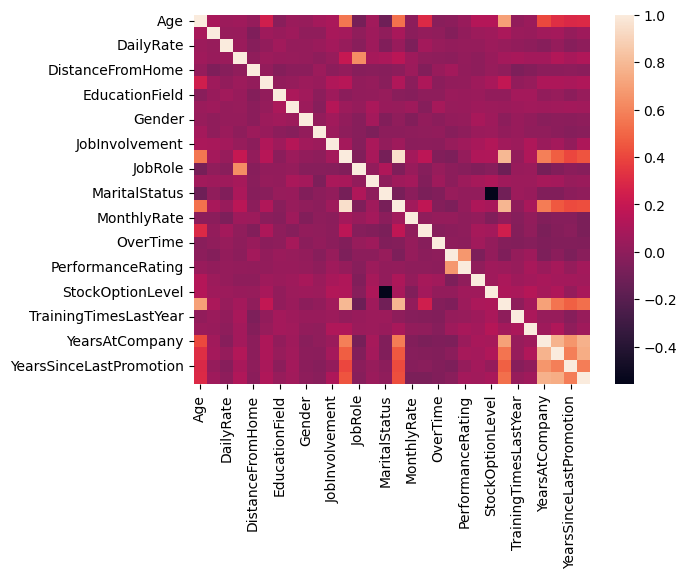

In [392]:
corr_mat=X_ft.corr()
sns.heatmap(corr_mat)

### No strong correlation observed

## Feature Selection 

In [393]:
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=29)
rfe.fit(X_new,Y_new)

RFE(estimator=LinearRegression(), n_features_to_select=29)

In [394]:
rfe_ranking = pd.DataFrame({'Features':X_new.columns, 'ranking':rfe.ranking_})
rfe_ranking.sort_values(by='ranking')

,Features,ranking
0,Age,1
27,YearsInCurrentRole,1
26,YearsAtCompany,1
25,WorkLifeBalance,1
24,TrainingTimesLastYear,1
23,TotalWorkingYears,1
22,StockOptionLevel,1
21,RelationshipSatisfaction,1
20,PerformanceRating,1
19,PercentSalaryHike,1


In [395]:
selected_features = rfe_ranking[rfe_ranking['ranking'] == 1]['Features'].tolist()

In [396]:
selected_features

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### Feature selection was performed using Recursive Feature Elimination (RFE), which selects top 29 best subset features by training and ranking them with a machine learning model

## Train Test Data Split 

In [397]:
X_new.shape

(2466, 30)

In [398]:
X_train, X_test, y_train, y_test=train_test_split(X_new[selected_features],Y_new,test_size=0.2,random_state=1)

## Model Training 

In [399]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

C:\Users\Avita\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=1)

## Prediction 

In [400]:
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

## Model Evaluation

In [401]:
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Logistic Regression Results:
Accuracy: 0.7267206477732794
Confusion Matrix:
 [[174  63]
 [ 72 185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       237
           1       0.75      0.72      0.73       257

    accuracy                           0.73       494
   macro avg       0.73      0.73      0.73       494
weighted avg       0.73      0.73      0.73       494

Random Forest Results:
Accuracy: 0.9008097165991903
Confusion Matrix:
 [[223  14]
 [ 35 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       237
           1       0.94      0.86      0.90       257

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



## Summary 
### After applying SMOTE to balance the dataset, both models significantly improved their ability to detect Attrition.

### - Logistic Regression achieved 74% accuracy with 74% recall for Attrition.
### - Random Forest outperformed with 90% accuracy and 87% recall.

### Based on overall balanced performance, **Random Forest is selected as the final model**.
### The Random Forest model trained on the top 29 features, effectively predicts employee Attrition.
### This model can help HR teams proactively address retention risks by focusing on the most influential factors.

In [405]:
cust_df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
final_df = cust_df[selected_features + ['Attrition']]

In [407]:
final_df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,1,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,2,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,4,0,17,3,2,9,6,0,8,No


In [408]:
# Save for Power BI
final_df.to_csv("clean_employee_attrition.csv", index=False)
